# Geely Auto - American market car pricing study 

> ## Objectives
- Identify key factors that influence the price of cars in the American car market
- Build a linear regression model for the prediction of car prices

> ## Approach
1. Read and get understanding of the data
2. Cleanup data
    - Remove duplicate rows
    - Remove unnecessary columns
    - Retain only the car company name in the car name column
3. Visualize the data to understan patterns and evaluate if linear regression is appropriate
    - Numerical values
    - Categorical values
4. Prepare data
    - Convert binary values to 0s and 1s
    - Convert categorical values to 0s and 1s using dummy variables method
5. Convert data frame to train(70%) and test(30%)
6. Scaling the numerical variables
7. Build a linear regression model with all the variables
8. Evaluate the model by checking the r-squared, adjusted r-squared, p-value and VIF.
    - drop variables with hight p-value and evaluate the model again with the above parameters
    - drop variables with high vif and evaluate the model again with the above parameters
9. Residual analysis to check if the assumptions of linear regression model is valid
10. Making preditions on the final model with the test data set
    - Model evaluation
    - Find r2 score

## 1. Read and get understanding of the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the assignment csv file

In [3]:
auto = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
auto.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> There are no null values identified in the dataframe.

In [6]:
auto.shape

(205, 26)

## 2. Cleanup data

### Identify if there are any duplicate rows

In [7]:
duplicate_rows = auto[auto.duplicated(subset=None, keep='first')]
print(duplicate_rows)

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


There are no exact duplicate rows.

### Drop insignificant columns

In [8]:
auto.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
auto.car_ID.head()

0    1
1    2
2    3
3    4
4    5
Name: car_ID, dtype: int64

### Car_ID contains the index which is not useful for the analysis. Hence dropping them.

In [10]:
auto = auto.drop('car_ID', axis=1)
auto.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

### Inspecting the numeric fields

In [11]:
auto.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### Identify if there is any correlation between variables

In [12]:
auto.corr()

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

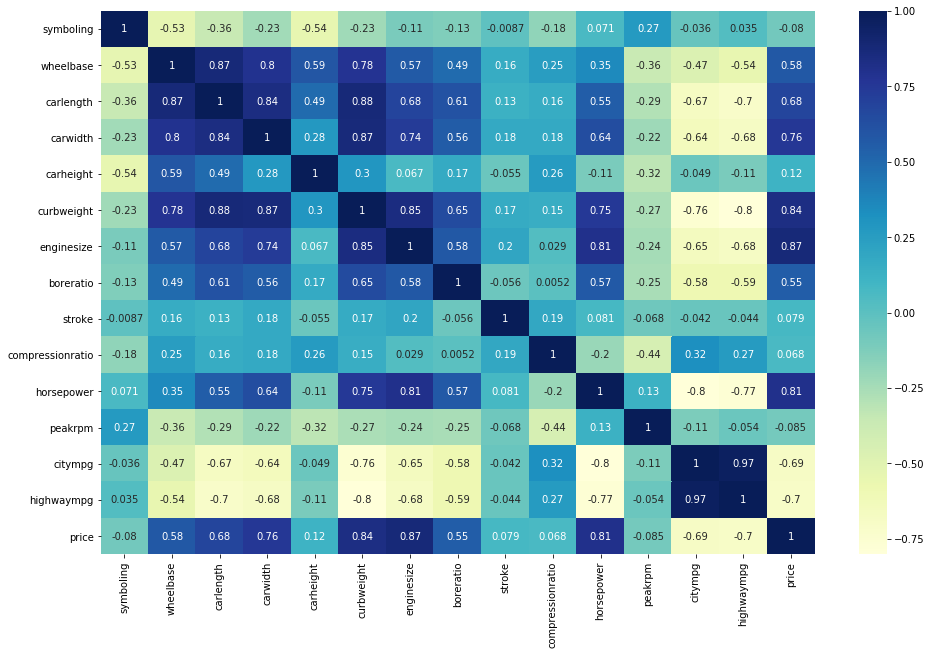

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(auto.corr(), annot = True, cmap="YlGnBu")
plt.show()

> There is a high correlation of 0.97 between highwaympg and citympg. Dropping one of the feature

In [14]:
auto = auto.drop('highwaympg', axis=1)
auto.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   cylindernumber  enginesize  fuelsystem boreratio stroke  compressionratio  \
0            four         130        mpfi      3.47   2.68               9.0   
1            four         130        mpfi      3.47   2.68               9.0   
2             six         152        mpfi      2.68   3.47               9.0   
3            four         109        mpfi      3.19   3.40              10.0   
4            five         136        mpfi      3.19   3.40               8.0   

  horsepower  peakrpm  citympg    price  
0        111     5000       21  13495.0  
1        111     5000       21  16500.0  
2        154     5000       19  16500.0  
3        102     5500       24  13950.0  
4        115     5500       18  17450.0  

[5 rows x 24 columns]

### Inspect CarName

In [15]:
auto.CarName.value_counts()

toyota corolla          6
peugeot 504             6
toyota corona           6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mercury cougar          1
nissan gt-r             1
mazda glc custom l      1
isuzu D-Max V-Cross     1
volkswagen 411 (sw)     1
Name: CarName, Length: 147, dtype: int64

### Keeping only company name in the CarName column

In [16]:
auto.CarName = auto.CarName.apply(lambda x: x.split()[0])
auto.head()

symboling      CarName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  ...  cylindernumber  \
0        rwd          front       88.6      168.8  ...            four   
1        rwd          front       88.6      168.8  ...            four   
2        rwd          front       94.5      171.2  ...             six   
3        fwd          front       99.8      176.6  ...            four   
4        4wd          front       99.4      176.6  ...            five   

   enginesize  fuelsystem boreratio stroke  compressionratio horsepower  \
0         130        mpfi      3.47   2.68               9.0        111   
1         130        mpfi      3.47   2.68               9.0        111   
2         152        mpfi      2.68   3.47               9.0        154   
3         109        mpfi      3.19   3.40              10.0        102   
4         136        mpfi      3.19   3.40               8.0        115   

   peakrpm  citympg    price  
0     5000       21  13495.0  
1     5000       21  16500.0  
2     5000       19  16500.0  
3     5500       24  13950.0  
4     5500       18  17450.0  

[5 rows x 24 columns]

In [17]:
auto.CarName.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
maxda           2
vw              2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Nissan          1
Name: CarName, dtype: int64

### There are car names with spelling mistake. 
1. converting values to upper

In [18]:
auto.CarName = auto.CarName.apply(lambda x: x.upper())

In [19]:
auto.CarName.value_counts()

TOYOTA         31
NISSAN         18
MAZDA          15
HONDA          13
MITSUBISHI     13
SUBARU         12
VOLVO          11
PEUGEOT        11
VOLKSWAGEN      9
DODGE           9
BUICK           8
BMW             8
AUDI            7
PLYMOUTH        7
SAAB            6
ISUZU           4
PORSCHE         4
ALFA-ROMERO     3
JAGUAR          3
CHEVROLET       3
VW              2
RENAULT         2
MAXDA           2
MERCURY         1
PORCSHCE        1
TOYOUTA         1
VOKSWAGEN       1
Name: CarName, dtype: int64

In [20]:
auto['CarName'].replace({"TOYOUTA": "TOYOTA", "PORCSHCE": "PORSCHE","VOKSWAGEN": "VOLKSWAGEN","VW": "VOLKSWAGEN", "MAXDA":"MAZDA"}, inplace=True)
len(auto.CarName.value_counts())

22

### door number and cylinder number are numeric values captured as text. Converting to numerical values for easier analysis

In [21]:
auto.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [22]:
auto['doornumber'].replace({"four":4,"two":2}, inplace=True)


In [23]:
auto.doornumber

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

In [24]:
auto.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [25]:
auto['cylindernumber'].replace({"two": 2, "three": 3,"four": 4,"five": 5, "six":6,"eight":8, "twelve":12}, inplace=True)
len(auto.CarName.value_counts())

22

In [26]:
type(auto.cylindernumber)

pandas.core.series.Series

## 3. Visualizing the data

### Visualizing numerical data

### Store numerical variables

In [27]:
auto.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
dtype: object

In [28]:
num_vars = ['symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'cylindernumber','doornumber','price']

> Since there are many numeric variables, The pair ploat matrix of all the features would be difficult to read. Selecting x_vars and y_vars

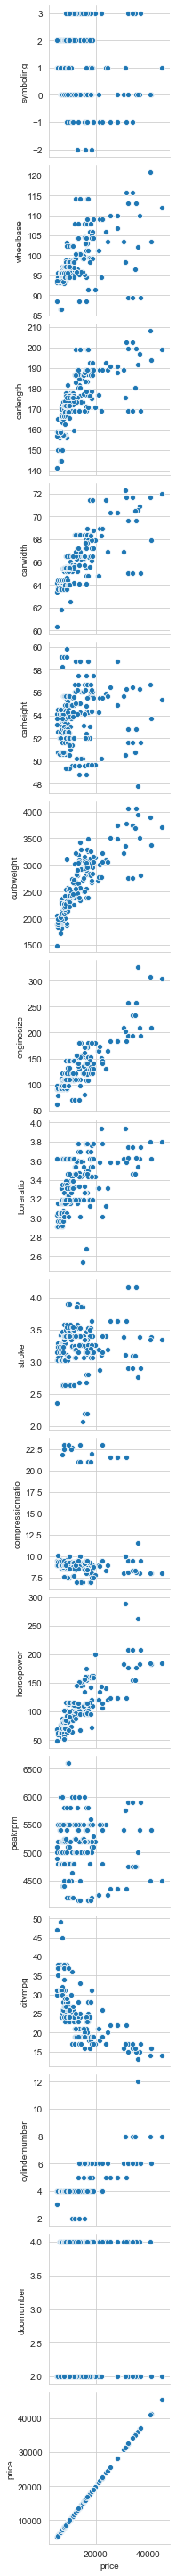

In [29]:
sns.set_style("whitegrid")
sns.pairplot(x_vars='price', y_vars=num_vars, data=auto,)
plt.show()

> From the scatterplot we can see that there are linear correlations for price with the features. Some are having positive correlation(ex: enginesize) and others with negative correlation(ex: citympg)

In [30]:
### Door number doesnt seem to have any correlation on price. Can drop the column 

In [31]:
auto['doornumber'].corr(auto['price'])

0.031835265845609785

In [32]:
auto = auto.drop('doornumber', axis=1)
auto.head()

symboling      CarName fueltype aspiration      carbody drivewheel  \
0          3  ALFA-ROMERO      gas        std  convertible        rwd   
1          3  ALFA-ROMERO      gas        std  convertible        rwd   
2          1  ALFA-ROMERO      gas        std    hatchback        rwd   
3          2         AUDI      gas        std        sedan        fwd   
4          2         AUDI      gas        std        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
0          front       88.6      168.8      64.1  ...               4   
1          front       88.6      168.8      64.1  ...               4   
2          front       94.5      171.2      65.5  ...               6   
3          front       99.8      176.6      66.2  ...               4   
4          front       99.4      176.6      66.4  ...               5   

   enginesize fuelsystem  boreratio  stroke compressionratio  horsepower  \
0         130       mpfi       3.47    2.68              9.0         111   
1         130       mpfi       3.47    2.68              9.0         111   
2         152       mpfi       2.68    3.47              9.0         154   
3         109       mpfi       3.19    3.40             10.0         102   
4         136       mpfi       3.19    3.40              8.0         115   

   peakrpm  citympg    price  
0     5000       21  13495.0  
1     5000       21  16500.0  
2     5000       19  16500.0  
3     5500       24  13950.0  
4     5500       18  17450.0  

[5 rows x 23 columns]

### Visualizing categorical data

In [33]:
auto.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
dtype: object

In [34]:
category_vars = ['CarName','fueltype','aspiration','carbody', 'drivewheel','enginelocation','enginetype','fuelsystem']

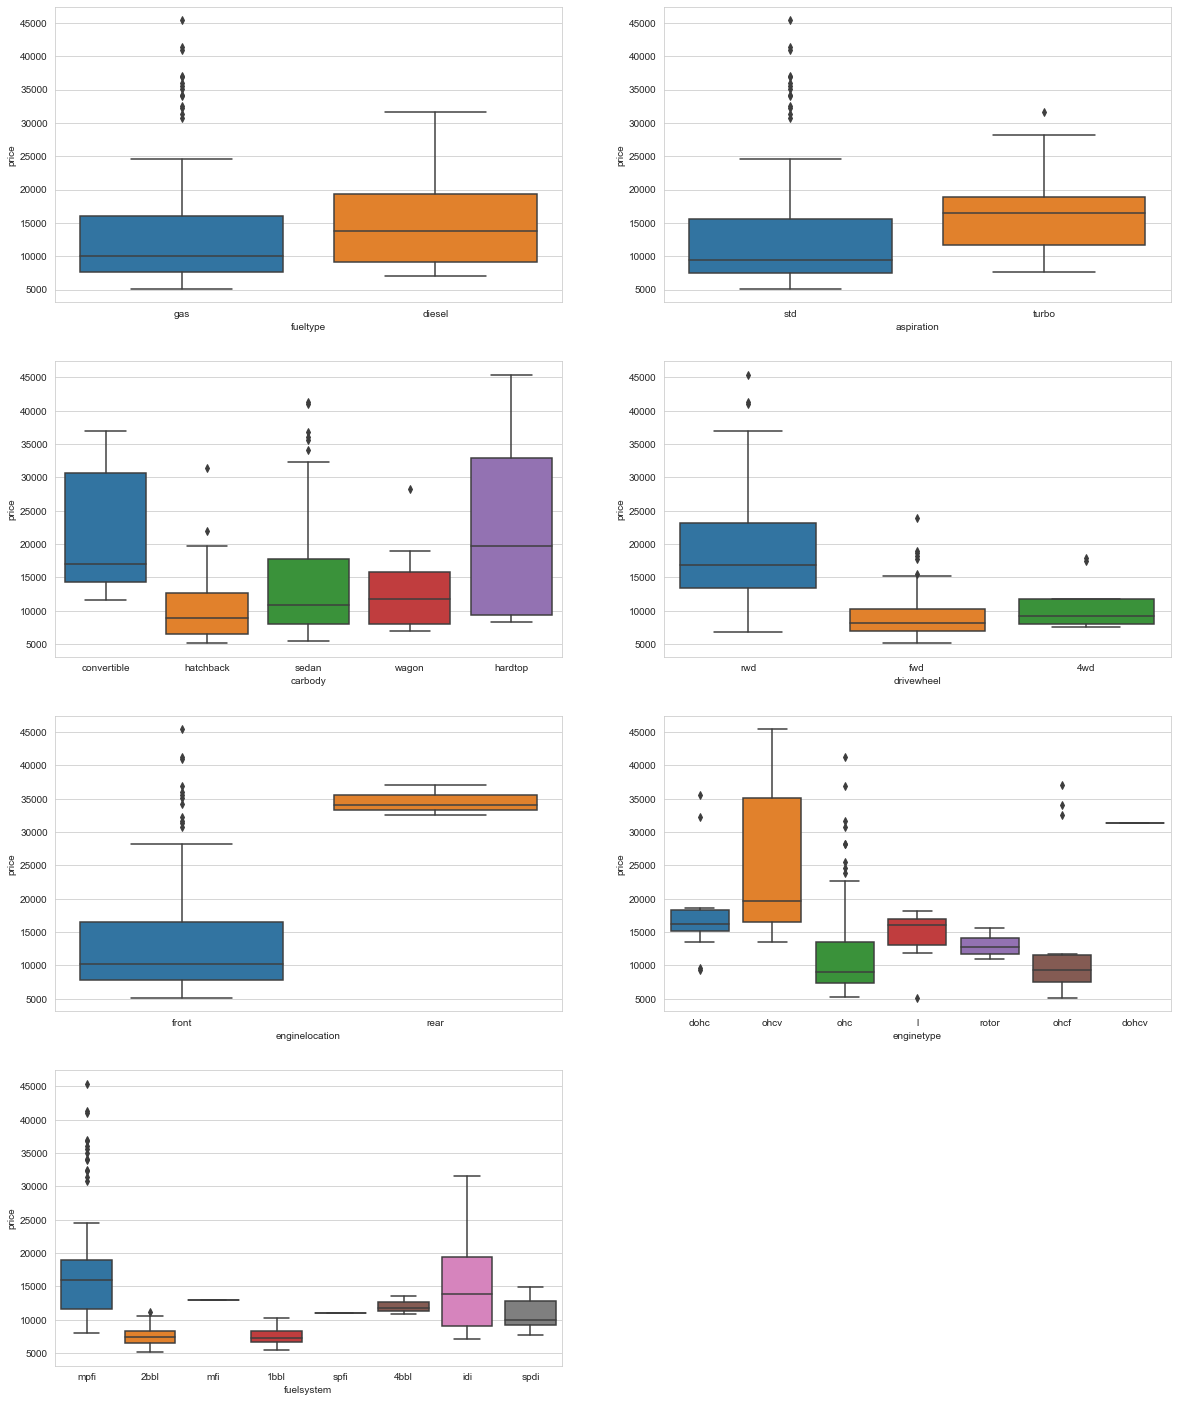

In [35]:
plt.figure(figsize=(20, 25))

plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)

plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)

plt.subplot(4,2,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto)

plt.show()

> 1. Diesel cars have slightly higher price than gas
  2. turbo aspiration has higher price
  4. convertible and hardtops have higher prices
  5. rwd drive wheels have higher price
  6. rear engine location has higher price
  7. ahcv engine type has the highest price
  8. mpfi fuel systems have higher price

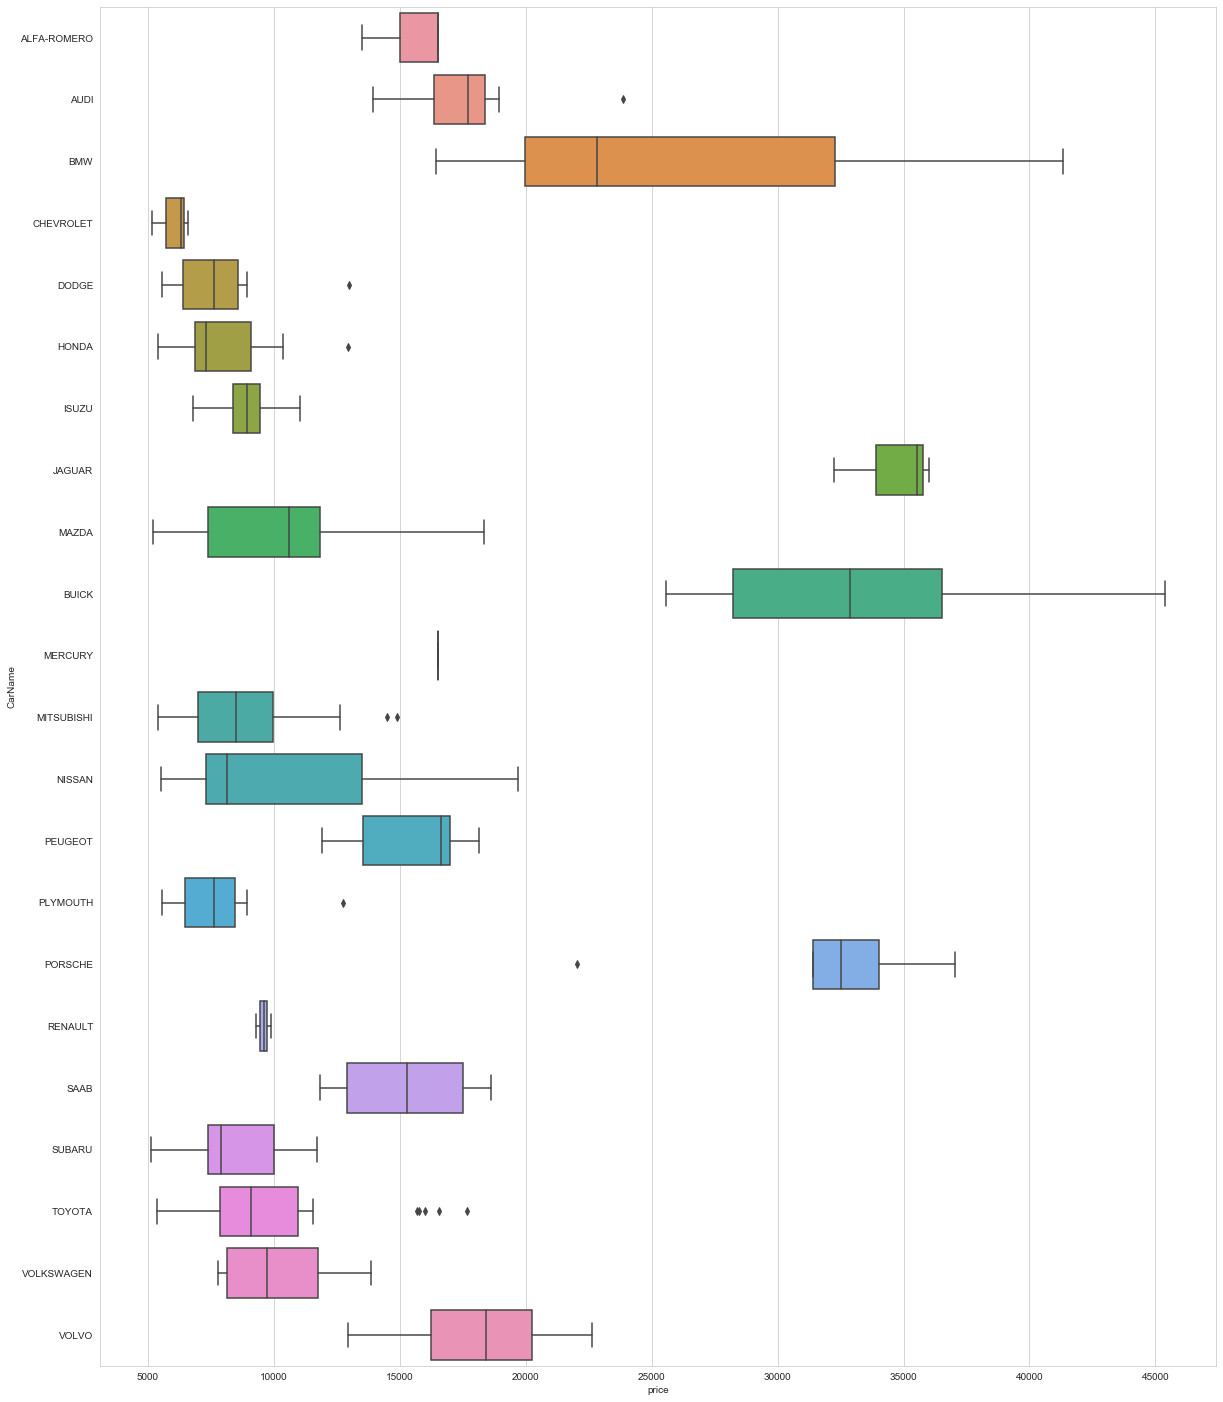

In [36]:
plt.figure(figsize=(20, 25))
sns.boxplot(x = 'price', y = 'CarName', data = auto)
plt.show()

> Certain brands have higher price segment. 
The Car Company would not help in prediction for prices of a new company. Dropping the column

In [37]:
auto = auto.drop('CarName', axis=1)
auto.head()

symboling fueltype aspiration      carbody drivewheel enginelocation  \
0          3      gas        std  convertible        rwd          front   
1          3      gas        std  convertible        rwd          front   
2          1      gas        std    hatchback        rwd          front   
3          2      gas        std        sedan        fwd          front   
4          2      gas        std        sedan        4wd          front   

   wheelbase  carlength  carwidth  carheight  ...  cylindernumber enginesize  \
0       88.6      168.8      64.1       48.8  ...               4        130   
1       88.6      168.8      64.1       48.8  ...               4        130   
2       94.5      171.2      65.5       52.4  ...               6        152   
3       99.8      176.6      66.2       54.3  ...               4        109   
4       99.4      176.6      66.4       54.3  ...               5        136   

   fuelsystem  boreratio stroke  compressionratio  horsepower  peakrpm  \
0        mpfi       3.47   2.68               9.0         111     5000   
1        mpfi       3.47   2.68               9.0         111     5000   
2        mpfi       2.68   3.47               9.0         154     5000   
3        mpfi       3.19   3.40              10.0         102     5500   
4        mpfi       3.19   3.40               8.0         115     5500   

   citympg    price  
0       21  13495.0  
1       21  16500.0  
2       19  16500.0  
3       24  13950.0  
4       18  17450.0  

[5 rows x 22 columns]

In [38]:
auto.shape

(205, 22)

In [39]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    int64  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

## 4. Prepare data

In [40]:
auto.shape

(205, 22)

## Prepare binary variables

Fuel type

In [41]:
auto.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [42]:
def binary_map(x):
    if x == 'gas':
        return 1
    else:
        return 0

auto['fueltype'] = auto['fueltype'].apply(binary_map)

In [43]:
auto.fueltype.value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [44]:
auto.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [45]:
def binary_map(x):
    if x == 'std':
        return 1
    else:
        return 0

auto['aspiration'] = auto['aspiration'].apply(binary_map)


In [46]:
auto.aspiration.value_counts()

1    168
0     37
Name: aspiration, dtype: int64

In [47]:
auto.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [48]:
def binary_map(x):
    if x == 'front':
        return 1
    else:
        return 0

auto['enginelocation'] = auto['enginelocation'].apply(binary_map)

In [49]:
auto.enginelocation.value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

In [50]:
auto.head()

symboling  fueltype  aspiration      carbody drivewheel  enginelocation  \
0          3         1           1  convertible        rwd               1   
1          3         1           1  convertible        rwd               1   
2          1         1           1    hatchback        rwd               1   
3          2         1           1        sedan        fwd               1   
4          2         1           1        sedan        4wd               1   

   wheelbase  carlength  carwidth  carheight  ...  cylindernumber enginesize  \
0       88.6      168.8      64.1       48.8  ...               4        130   
1       88.6      168.8      64.1       48.8  ...               4        130   
2       94.5      171.2      65.5       52.4  ...               6        152   
3       99.8      176.6      66.2       54.3  ...               4        109   
4       99.4      176.6      66.4       54.3  ...               5        136   

   fuelsystem  boreratio stroke  compressionratio  horsepower  peakrpm  \
0        mpfi       3.47   2.68               9.0         111     5000   
1        mpfi       3.47   2.68               9.0         111     5000   
2        mpfi       2.68   3.47               9.0         154     5000   
3        mpfi       3.19   3.40              10.0         102     5500   
4        mpfi       3.19   3.40               8.0         115     5500   

   citympg    price  
0       21  13495.0  
1       21  16500.0  
2       19  16500.0  
3       24  13950.0  
4       18  17450.0  

[5 rows x 22 columns]

In [51]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    int64  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    int64  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [52]:
status = pd.get_dummies(auto['fuelsystem'], drop_first = True)

In [53]:
status = pd.get_dummies(auto['fuelsystem'], drop_first = True)
auto = pd.concat([auto, status], axis = 1)
auto.drop(['fuelsystem'], axis = 1, inplace = True)
auto.head()

symboling  fueltype  aspiration      carbody drivewheel  enginelocation  \
0          3         1           1  convertible        rwd               1   
1          3         1           1  convertible        rwd               1   
2          1         1           1    hatchback        rwd               1   
3          2         1           1        sedan        fwd               1   
4          2         1           1        sedan        4wd               1   

   wheelbase  carlength  carwidth  carheight  ...  peakrpm citympg    price  \
0       88.6      168.8      64.1       48.8  ...     5000      21  13495.0   
1       88.6      168.8      64.1       48.8  ...     5000      21  16500.0   
2       94.5      171.2      65.5       52.4  ...     5000      19  16500.0   
3       99.8      176.6      66.2       54.3  ...     5500      24  13950.0   
4       99.4      176.6      66.4       54.3  ...     5500      18  17450.0   

   2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  
0     0     0    0    0     1     0     0  
1     0     0    0    0     1     0     0  
2     0     0    0    0     1     0     0  
3     0     0    0    0     1     0     0  
4     0     0    0    0     1     0     0  

[5 rows x 28 columns]

In [54]:
status = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, status], axis = 1)
auto.drop(['carbody'], axis = 1, inplace = True)
auto.head()

symboling  fueltype  aspiration drivewheel  enginelocation  wheelbase  \
0          3         1           1        rwd               1       88.6   
1          3         1           1        rwd               1       88.6   
2          1         1           1        rwd               1       94.5   
3          2         1           1        fwd               1       99.8   
4          2         1           1        4wd               1       99.4   

   carlength  carwidth  carheight  curbweight  ... 4bbl  idi  mfi  mpfi  spdi  \
0      168.8      64.1       48.8        2548  ...    0    0    0     1     0   
1      168.8      64.1       48.8        2548  ...    0    0    0     1     0   
2      171.2      65.5       52.4        2823  ...    0    0    0     1     0   
3      176.6      66.2       54.3        2337  ...    0    0    0     1     0   
4      176.6      66.4       54.3        2824  ...    0    0    0     1     0   

   spfi  hardtop  hatchback  sedan  wagon  
0     0        0          0      0      0  
1     0        0          0      0      0  
2     0        0          1      0      0  
3     0        0          0      1      0  
4     0        0          0      1      0  

[5 rows x 31 columns]

In [55]:
status = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, status], axis = 1)
auto.drop(['drivewheel'], axis = 1, inplace = True)
auto.head()

symboling  fueltype  aspiration  enginelocation  wheelbase  carlength  \
0          3         1           1               1       88.6      168.8   
1          3         1           1               1       88.6      168.8   
2          1         1           1               1       94.5      171.2   
3          2         1           1               1       99.8      176.6   
4          2         1           1               1       99.4      176.6   

   carwidth  carheight  curbweight enginetype  ...  mfi  mpfi  spdi  spfi  \
0      64.1       48.8        2548       dohc  ...    0     1     0     0   
1      64.1       48.8        2548       dohc  ...    0     1     0     0   
2      65.5       52.4        2823       ohcv  ...    0     1     0     0   
3      66.2       54.3        2337        ohc  ...    0     1     0     0   
4      66.4       54.3        2824        ohc  ...    0     1     0     0   

   hardtop  hatchback  sedan  wagon  fwd  rwd  
0        0          0      0      0    0    1  
1        0          0      0      0    0    1  
2        0          1      0      0    0    1  
3        0          0      1      0    1    0  
4        0          0      1      0    0    0  

[5 rows x 32 columns]

In [56]:
status = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, status], axis = 1)
auto.drop(['enginetype'], axis = 1, inplace = True)
auto.head()

symboling  fueltype  aspiration  enginelocation  wheelbase  carlength  \
0          3         1           1               1       88.6      168.8   
1          3         1           1               1       88.6      168.8   
2          1         1           1               1       94.5      171.2   
3          2         1           1               1       99.8      176.6   
4          2         1           1               1       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  ...  sedan  wagon  fwd  \
0      64.1       48.8        2548               4  ...      0      0    0   
1      64.1       48.8        2548               4  ...      0      0    0   
2      65.5       52.4        2823               6  ...      0      0    0   
3      66.2       54.3        2337               4  ...      1      0    1   
4      66.4       54.3        2824               5  ...      1      0    0   

   rwd  dohcv  l  ohc  ohcf  ohcv  rotor  
0    1      0  0    0     0     0      0  
1    1      0  0    0     0     0      0  
2    1      0  0    0     0     1      0  
3    0      0  0    1     0     0      0  
4    0      0  0    1     0     0      0  

[5 rows x 37 columns]

In [57]:
auto.enginelocation.value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

In [58]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   enginelocation    205 non-null    int64  
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   cylindernumber    205 non-null    int64  
 10  enginesize        205 non-null    int64  
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  citympg           205 non-null    int64  
 1

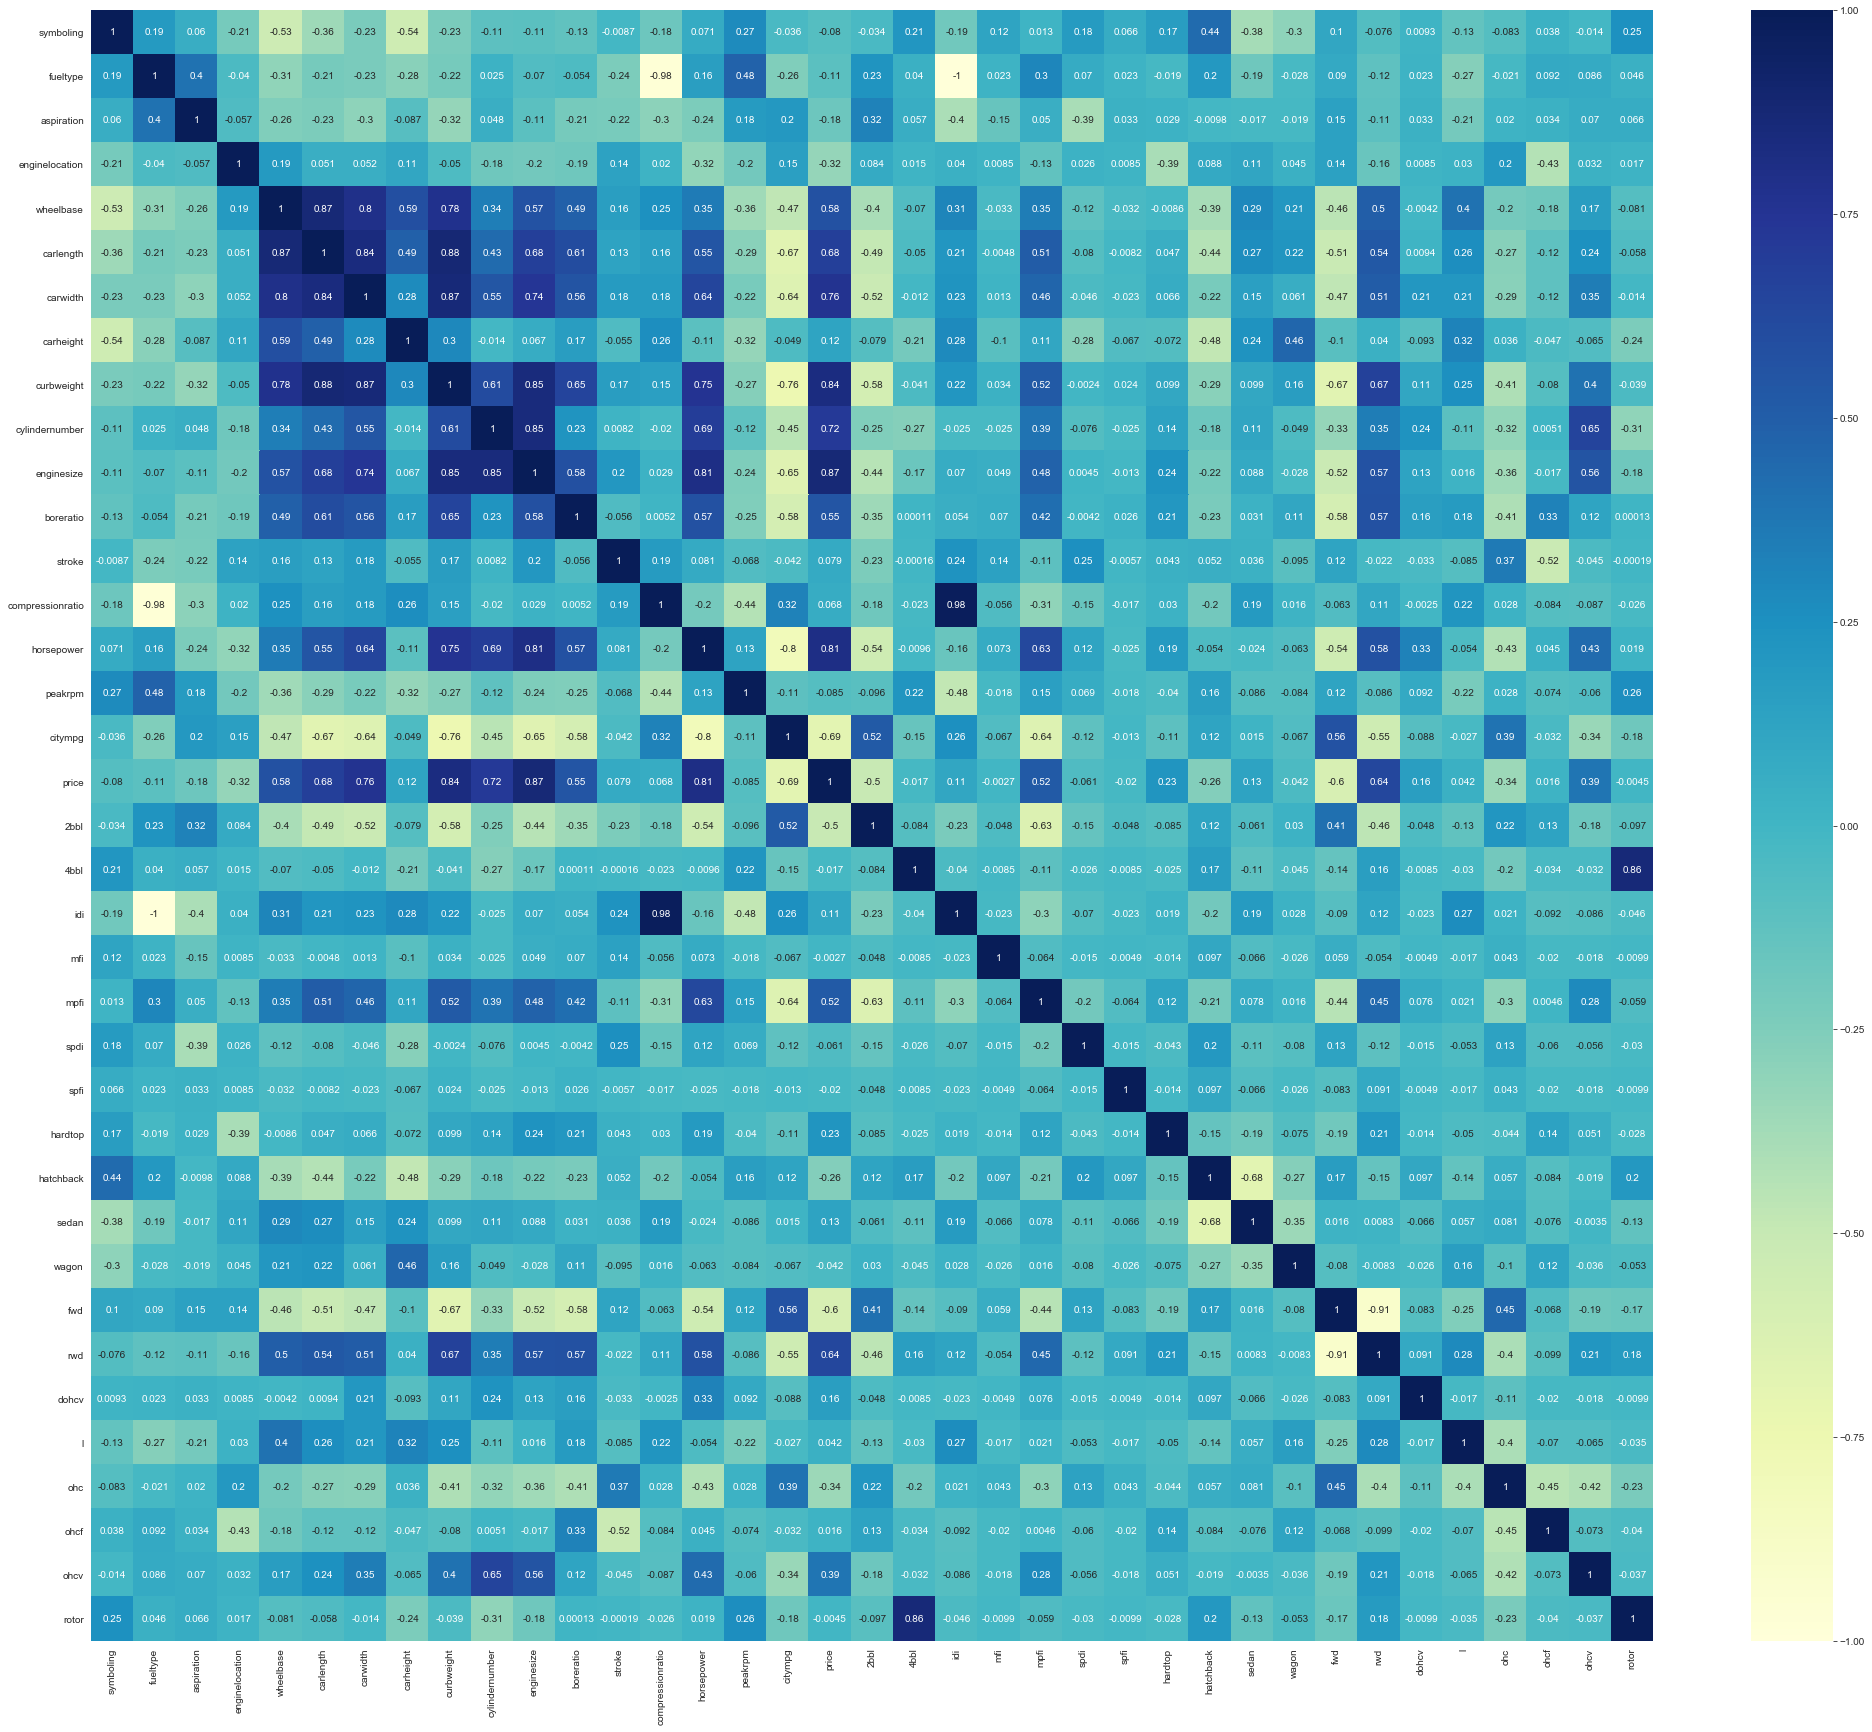

In [59]:
plt.figure(figsize = (35, 30))
sns.heatmap(auto.corr(), annot = True, cmap="YlGnBu")
plt.show()

> Since there are many features, interpreting data from heatmapt is very difficult

## 5. Convert data frame to train(70%) and test(30%)

In [60]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
auto_train, auto_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
auto_train.shape

(143, 37)

In [62]:
auto_test.shape

(62, 37)

## 6. Scaling the numerical variables using Min-Max Scaling

In [63]:
num_vars.remove('doornumber')

In [64]:
num_vars

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'cylindernumber',
 'price']

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
auto_train[num_vars] = scaler.fit_transform(auto_train[num_vars])

In [66]:
auto_train.price.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

### Correlation matrix after the scaling

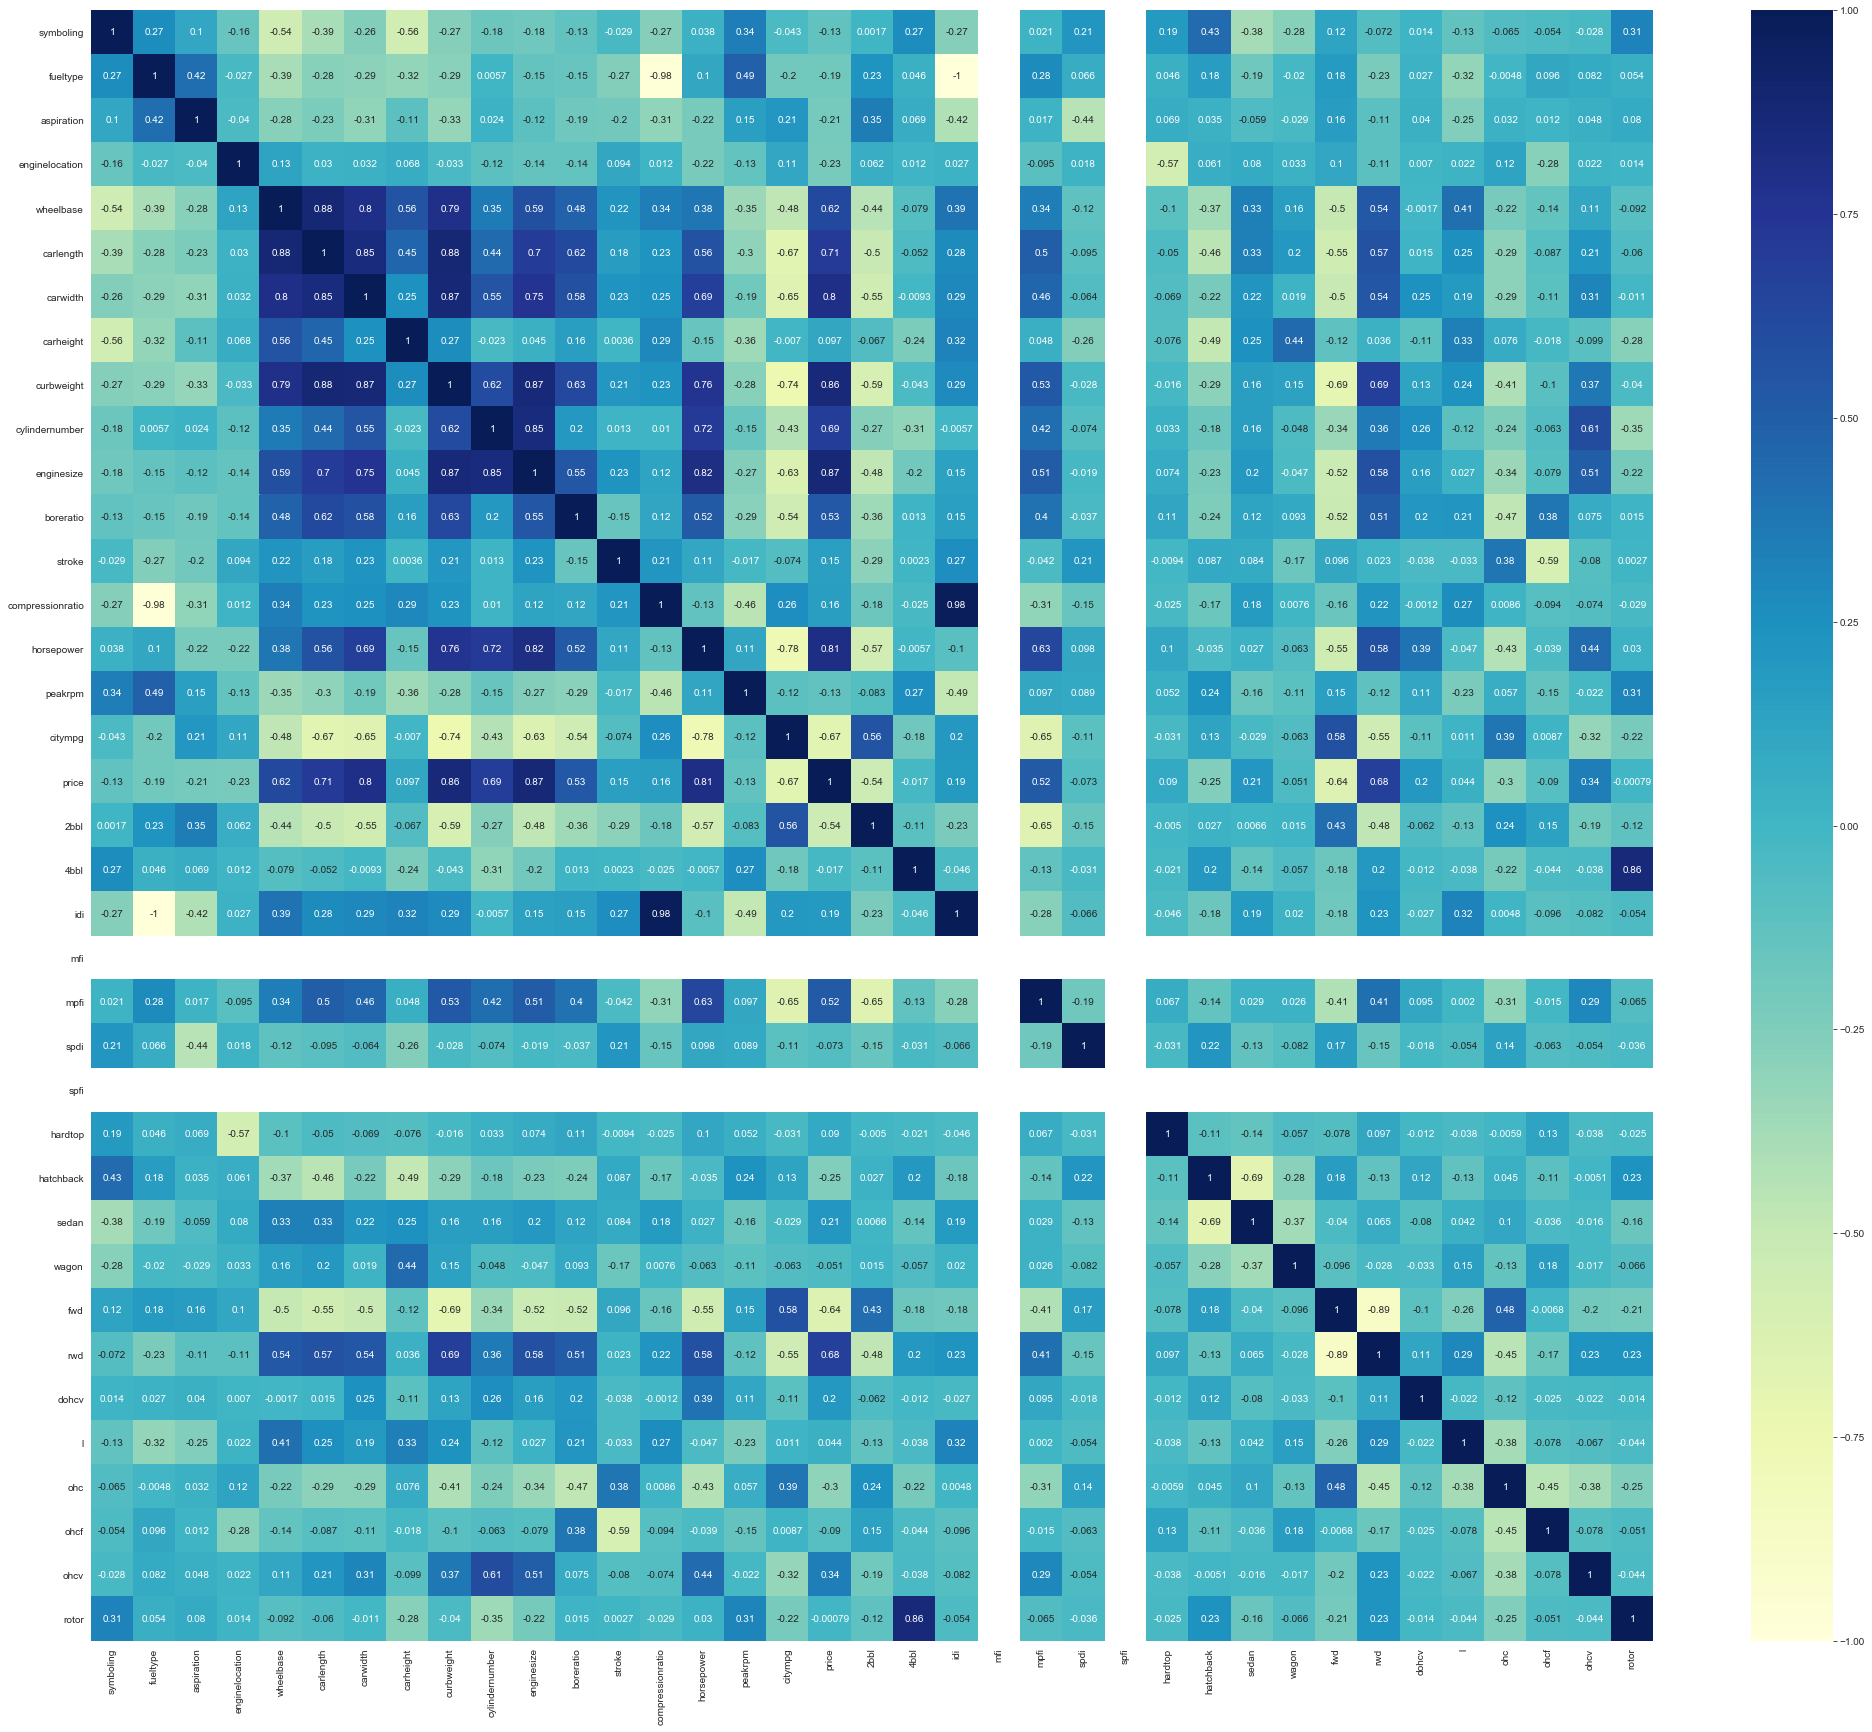

In [67]:
plt.figure(figsize = (35, 30))
sns.heatmap(auto_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

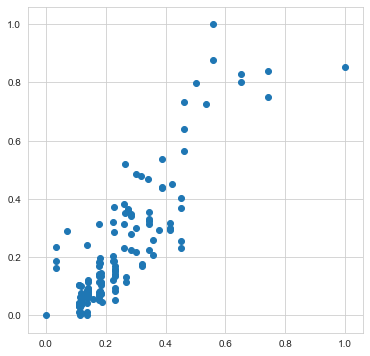

In [68]:
plt.figure(figsize=[6,6])
plt.scatter(auto_train.enginesize, auto_train.price)
plt.show()

In [69]:
y_train = auto_train.pop('price')
X_train = auto_train

In [70]:
auto.columns

Index(['symboling', 'fueltype', 'aspiration', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'],
      dtype='object')

In [71]:
auto.spfi.value_counts()

0    204
1      1
Name: spfi, dtype: int64

In [72]:
auto.mfi.value_counts()

0    204
1      1
Name: mfi, dtype: int64

## 7. Build a linear regression model with all the variables

In [73]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               2.483531e-01
symboling           6.016055e-02
fueltype           -2.105375e-02
aspiration         -4.063992e-02
enginelocation     -2.513582e-01
wheelbase           9.739472e-02
carlength          -1.767271e-02
carwidth            1.936619e-01
carheight           8.114467e-02
curbweight          1.547471e-01
cylindernumber     -7.285652e-01
enginesize          1.611252e+00
boreratio          -3.608936e-01
stroke             -3.723294e-01
compressionratio   -3.278639e-01
horsepower          2.420540e-01
peakrpm             1.104496e-01
citympg             1.874132e-01
2bbl                1.901689e-02
4bbl                2.771343e-02
idi                 2.694069e-01
mfi                -1.221096e-16
mpfi                2.741641e-02
spdi               -5.210216e-02
spfi                6.287683e-16
hardtop            -1.437680e-01
hatchback          -1.131567e-01
sedan              -9.417606e-02
wagon              -1.175839e-01
fwd                -9.170217e-04
rwd       

## 8. Evaluate the model by checking the r-squared, adjusted r-squared, p-value and VIF.

In [74]:
print(lr_1.summary())

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     42.36
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.95e-48
Time:                        21:37:17   Log-Likelihood:                 204.74
No. Observations:                 143   AIC:                            -341.5
Df Residuals:                     109   BIC:                            -240.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2484      0.135      1.837      0.069      -0

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1           fueltype  915.22
19               idi  226.35
13  compressionratio  127.22
10        enginesize  100.40
9     cylindernumber   42.26
8         curbweight   40.38
14        horsepower   29.39
26             sedan   23.38
25         hatchback   18.77
5          carlength   18.67
4          wheelbase   16.88
11         boreratio   15.35
27             wagon   12.42
6           carwidth   11.84
29               rwd   10.83
21              mpfi   10.01
16           citympg    9.68
28               fwd    9.00
33              ohcf    8.77
32               ohc    8.05
17              2bbl    7.51
35             rotor    6.91
12            stroke    6.78
18              4bbl    4.94
2         aspiration    4.90
7          carheight    4.15
31                 l    4.09
30             dohcv    4.04
24           hardtop    3.52
34              ohcv    3.49
22              spdi    3.46
15           peakrpm    3.45
0          symboling    3.00
3     enginelocation    2.49
20               mfi     NaN
23              spfi     NaN

### Dropping the 'l' feature which has very high p-value of .983 which means the feature is insignificant

In [77]:
X = X_train.drop('l', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.08
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.40e-49
Time:                        21:37:17   Log-Likelihood:                 204.74
No. Observations:                 143   AIC:                            -343.5
Df Residuals:                     110   BIC:                            -245.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2494      0.125      1.996      0.048       0

Features     VIF
1           fueltype  866.22
19               idi  190.72
13  compressionratio  112.17
10        enginesize   96.23
9     cylindernumber   40.22
8         curbweight   39.87
14        horsepower   27.88
26             sedan   21.56
5          carlength   17.81
25         hatchback   17.71
4          wheelbase   16.54
11         boreratio   13.85
6           carwidth   11.59
27             wagon   11.46
29               rwd   10.80
21              mpfi    9.89
16           citympg    9.58
28               fwd    8.96
17              2bbl    7.36
34             rotor    6.86
12            stroke    6.76
32              ohcf    5.55
2         aspiration    4.89
18              4bbl    4.85
31               ohc    4.24
7          carheight    4.14
30             dohcv    4.00
22              spdi    3.43
15           peakrpm    3.41
24           hardtop    3.37
33              ohcv    3.19
0          symboling    2.96
3     enginelocation    2.25
20               mfi     NaN
23              spfi     NaN

 > Adj. R-squared:                  0.907

### Dropping the 'fwd' feature which has very high p-value of .979 which means the feature is insignificant

In [78]:
X = X.drop('fwd', 1)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     45.92
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.43e-50
Time:                        21:37:18   Log-Likelihood:                 204.74
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     111   BIC:                            -250.7
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2489      0.123      2.027      0.045       0

Features     VIF
1           fueltype  791.58
19               idi  190.40
13  compressionratio  107.84
10        enginesize   93.74
9     cylindernumber   39.35
8         curbweight   32.51
14        horsepower   27.75
26             sedan   21.25
5          carlength   17.59
25         hatchback   17.46
4          wheelbase   15.63
11         boreratio   13.85
6           carwidth   11.55
27             wagon   11.39
21              mpfi    9.86
16           citympg    9.57
17              2bbl    7.33
33             rotor    6.83
12            stroke    6.76
31              ohcf    5.35
2         aspiration    4.88
18              4bbl    4.84
28               rwd    4.27
30               ohc    4.23
7          carheight    4.09
29             dohcv    3.99
22              spdi    3.42
15           peakrpm    3.41
24           hardtop    3.30
32              ohcv    3.11
0          symboling    2.92
3     enginelocation    2.22
20               mfi     NaN
23              spfi     NaN

### Dropping the 'carlength' feature which has very high p-value which means the feature is insignificant

In [79]:
X = X.drop('carlength', 1)
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     47.86
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.30e-51
Time:                        21:37:18   Log-Likelihood:                 204.72
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     112   BIC:                            -255.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2498      0.122      2.045      0.043       0

Features     VIF
1           fueltype  790.89
18               idi  189.05
12  compressionratio  104.24
9         enginesize   91.14
8     cylindernumber   39.30
7         curbweight   30.74
13        horsepower   27.03
25             sedan   20.53
24         hatchback   17.45
4          wheelbase   14.44
10         boreratio   13.31
26             wagon   10.97
5           carwidth   10.29
20              mpfi    9.61
15           citympg    8.73
16              2bbl    7.20
11            stroke    6.73
32             rotor    6.54
30              ohcf    5.04
17              4bbl    4.78
2         aspiration    4.43
27               rwd    4.17
29               ohc    4.17
6          carheight    4.09
28             dohcv    3.48
23           hardtop    3.29
14           peakrpm    3.28
21              spdi    3.27
31              ohcv    3.07
0          symboling    2.92
3     enginelocation    2.22
19               mfi     NaN
22              spfi     NaN

### Dropping the 'fueltype' feature which has very high p-value which means the feature is insignificant

In [80]:
X = X.drop('fueltype', 1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     47.86
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.30e-51
Time:                        21:37:19   Log-Likelihood:                 204.72
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     112   BIC:                            -255.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2261      0.161      1.403      0.163      -0

Features     VIF
8         enginesize  275.37
2     enginelocation  207.68
7     cylindernumber  179.52
11  compressionratio  171.58
6         curbweight  133.83
17               idi  126.37
9          boreratio   81.06
12        horsepower   76.56
4           carwidth   74.95
3          wheelbase   72.40
10            stroke   67.34
24             sedan   39.15
14           citympg   30.87
23         hatchback   26.54
5          carheight   25.35
1         aspiration   23.17
0          symboling   17.99
19              mpfi   16.25
13           peakrpm   15.10
28               ohc   12.90
25             wagon   12.62
15              2bbl    9.94
31             rotor    6.69
26               rwd    6.12
16              4bbl    4.84
29              ohcf    4.80
22           hardtop    3.30
30              ohcv    3.27
20              spdi    3.18
27             dohcv    3.09
18               mfi     NaN
21              spfi     NaN

### Dropping the 'spfi' feature which has very high p-value which means the feature is insignificant

In [81]:
X = X.drop('spfi', 1)
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     47.86
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.30e-51
Time:                        21:37:19   Log-Likelihood:                 204.72
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     112   BIC:                            -255.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2261      0.161      1.403      0.163      -0

Features     VIF
8         enginesize  275.37
2     enginelocation  207.68
7     cylindernumber  179.52
11  compressionratio  171.58
6         curbweight  133.83
17               idi  126.37
9          boreratio   81.06
12        horsepower   76.56
4           carwidth   74.95
3          wheelbase   72.40
10            stroke   67.34
23             sedan   39.15
14           citympg   30.87
22         hatchback   26.54
5          carheight   25.35
1         aspiration   23.17
0          symboling   17.99
19              mpfi   16.25
13           peakrpm   15.10
27               ohc   12.90
24             wagon   12.62
15              2bbl    9.94
30             rotor    6.69
25               rwd    6.12
16              4bbl    4.84
28              ohcf    4.80
21           hardtop    3.30
29              ohcv    3.27
20              spdi    3.18
26             dohcv    3.09
18               mfi     NaN

### Dropping the '4bbl' feature which has very high p-value which means the feature is insignificant

In [82]:
X = X.drop('4bbl', 1)
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     49.91
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.36e-51
Time:                        21:37:19   Log-Likelihood:                 204.66
No. Observations:                 143   AIC:                            -349.3
Df Residuals:                     113   BIC:                            -260.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2309      0.160      1.445      0.151      -0

Features     VIF
8         enginesize  268.60
2     enginelocation  207.17
7     cylindernumber  172.12
11  compressionratio  171.12
6         curbweight  132.81
16               idi  126.36
9          boreratio   77.83
12        horsepower   76.04
4           carwidth   74.91
3          wheelbase   72.36
10            stroke   66.68
22             sedan   39.11
14           citympg   30.86
21         hatchback   26.53
5          carheight   25.14
1         aspiration   23.17
0          symboling   17.81
13           peakrpm   15.05
18              mpfi   14.43
26               ohc   12.88
23             wagon   12.61
15              2bbl    9.01
24               rwd    6.12
27              ohcf    4.77
29             rotor    3.64
20           hardtop    3.29
28              ohcv    3.27
25             dohcv    3.09
19              spdi    3.04
17               mfi     NaN

### Dropping the '2bbl' feature which has very high p-value which means the feature is insignificant

In [83]:
X = X.drop('2bbl', 1)
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     52.01
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.14e-52
Time:                        21:37:19   Log-Likelihood:                 204.48
No. Observations:                 143   AIC:                            -351.0
Df Residuals:                     114   BIC:                            -265.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2564      0.152      1.691      0.094      -0

Features     VIF
8         enginesize  257.63
2     enginelocation  205.01
11  compressionratio  170.94
7     cylindernumber  169.42
6         curbweight  130.51
15               idi  125.38
9          boreratio   75.61
12        horsepower   74.35
4           carwidth   73.87
3          wheelbase   71.26
10            stroke   66.49
21             sedan   38.44
14           citympg   30.46
20         hatchback   26.43
5          carheight   24.21
1         aspiration   22.76
0          symboling   16.68
13           peakrpm   13.15
25               ohc   12.73
22             wagon   12.46
23               rwd    6.04
17              mpfi    6.03
26              ohcf    4.74
28             rotor    3.41
27              ohcv    3.27
19           hardtop    3.25
24             dohcv    3.05
18              spdi    2.27
16               mfi     NaN

### Dropping the 'mfi' feature which has very high p-value which means the feature is insignificant

In [84]:
X = X.drop('mfi', 1)
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     52.01
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.14e-52
Time:                        21:37:20   Log-Likelihood:                 204.48
No. Observations:                 143   AIC:                            -351.0
Df Residuals:                     114   BIC:                            -265.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2564      0.152      1.691      0.094      -0

Features     VIF
8         enginesize  257.63
2     enginelocation  205.01
11  compressionratio  170.94
7     cylindernumber  169.42
6         curbweight  130.51
15               idi  125.38
9          boreratio   75.61
12        horsepower   74.35
4           carwidth   73.87
3          wheelbase   71.26
10            stroke   66.49
20             sedan   38.44
14           citympg   30.46
19         hatchback   26.43
5          carheight   24.21
1         aspiration   22.76
0          symboling   16.68
13           peakrpm   13.15
24               ohc   12.73
21             wagon   12.46
22               rwd    6.04
16              mpfi    6.03
25              ohcf    4.74
27             rotor    3.41
26              ohcv    3.27
18           hardtop    3.25
23             dohcv    3.05
17              spdi    2.27

### Dropping the 'mpfi' feature which has very high p-value which means the feature is insignificant

In [85]:
X = X.drop('mpfi', 1)
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     54.29
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.23e-53
Time:                        21:37:20   Log-Likelihood:                 204.33
No. Observations:                 143   AIC:                            -352.7
Df Residuals:                     115   BIC:                            -269.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2537      0.151      1.679      0.096      -0

Features     VIF
8         enginesize  238.42
2     enginelocation  205.00
11  compressionratio  170.52
7     cylindernumber  168.63
6         curbweight  130.37
15               idi  125.31
9          boreratio   73.99
4           carwidth   73.19
3          wheelbase   66.67
10            stroke   65.29
12        horsepower   57.54
19             sedan   35.58
14           citympg   30.23
18         hatchback   24.32
5          carheight   24.07
1         aspiration   21.69
0          symboling   16.42
13           peakrpm   12.85
23               ohc   12.64
20             wagon   11.62
21               rwd    6.03
24              ohcf    4.74
25              ohcv    3.22
17           hardtop    3.11
26             rotor    3.11
22             dohcv    2.77
16              spdi    1.98

### Dropping the 'obcv' feature which has very high p-value which means the feature is insignificant

In [86]:
X = X.drop('ohcv', 1)
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     56.51
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.92e-54
Time:                        21:37:20   Log-Likelihood:                 203.91
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     116   BIC:                            -273.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2544      0.151      1.686      0.094      -0

Features     VIF
8         enginesize  236.78
2     enginelocation  199.23
11  compressionratio  166.89
7     cylindernumber  161.60
6         curbweight  129.75
15               idi  122.52
9          boreratio   73.90
4           carwidth   67.40
10            stroke   63.70
12        horsepower   55.69
3          wheelbase   54.55
19             sedan   34.69
14           citympg   29.71
5          carheight   23.58
18         hatchback   23.28
1         aspiration   21.68
0          symboling   15.07
13           peakrpm   12.76
20             wagon   11.37
23               ohc    9.33
21               rwd    5.99
24              ohcf    3.90
25             rotor    3.07
17           hardtop    2.96
22             dohcv    2.55
16              spdi    1.98

### Dropping the 'curbweight' feature which has very high p-value which means the feature is insignificant

In [87]:
X = X.drop('curbweight', 1)
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     58.52
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.50e-54
Time:                        21:37:20   Log-Likelihood:                 203.06
No. Observations:                 143   AIC:                            -354.1
Df Residuals:                     117   BIC:                            -277.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3114      0.143      2.176      0.032       0

Features     VIF
7         enginesize  188.00
10  compressionratio  166.84
2     enginelocation  161.62
6     cylindernumber  149.70
14               idi  122.36
8          boreratio   71.04
9             stroke   62.09
4           carwidth   61.19
11        horsepower   54.12
3          wheelbase   53.54
18             sedan   34.69
13           citympg   26.19
17         hatchback   23.27
5          carheight   21.37
1         aspiration   21.21
0          symboling   15.01
12           peakrpm   12.74
19             wagon   11.06
22               ohc    9.20
20               rwd    5.68
23              ohcf    3.90
24             rotor    3.07
16           hardtop    2.95
21             dohcv    2.55
15              spdi    1.98

### Dropping the 'compressionratio' feature which has very high p-value which means the feature is insignificant

In [88]:
X = X.drop('compressionratio', 1)
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     60.46
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.64e-55
Time:                        21:37:20   Log-Likelihood:                 201.96
No. Observations:                 143   AIC:                            -353.9
Df Residuals:                     118   BIC:                            -279.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3229      0.143      2.253      0.026       0.039  

Features     VIF
7       enginesize  180.71
2   enginelocation  160.76
6   cylindernumber  135.84
8        boreratio   67.57
9           stroke   61.64
4         carwidth   61.10
10      horsepower   54.04
3        wheelbase   53.46
17           sedan   34.52
12         citympg   23.49
16       hatchback   23.19
5        carheight   20.78
1       aspiration   17.62
0        symboling   14.88
11         peakrpm   12.48
18           wagon   10.97
21             ohc    9.15
19             rwd    5.67
13             idi    3.80
22            ohcf    3.79
15         hardtop    2.90
23           rotor    2.82
20           dohcv    2.52
14            spdi    1.89

### Dropping the 'idi' feature which has very high p-value which means the feature is insignificant

In [89]:
X = X.drop('idi', 1)
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.62
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.74e-56
Time:                        21:37:20   Log-Likelihood:                 201.96
No. Observations:                 143   AIC:                            -355.9
Df Residuals:                     119   BIC:                            -284.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3230      0.143      2.264      0.025       0.040  

Features     VIF
7       enginesize  180.02
2   enginelocation  150.67
6   cylindernumber  134.24
8        boreratio   67.05
4         carwidth   59.66
9           stroke   58.83
3        wheelbase   53.45
10      horsepower   49.15
16           sedan   34.40
15       hatchback   23.07
5        carheight   20.44
12         citympg   18.95
0        symboling   14.76
1       aspiration   12.43
11         peakrpm   12.33
17           wagon   10.94
20             ohc    9.14
18             rwd    5.27
21            ohcf    3.78
14         hardtop    2.87
22           rotor    2.57
19           dohcv    2.46
13            spdi    1.86

### Making further changes was reducing Adj R squared. Selecting lr_14 as the final model

In [90]:
y_train_price = lr_14.predict(X_train_lm)

## 9. Residual analysis to check if the assumptions of linear regression model is valid

Text(0.5, 0, 'Errors')

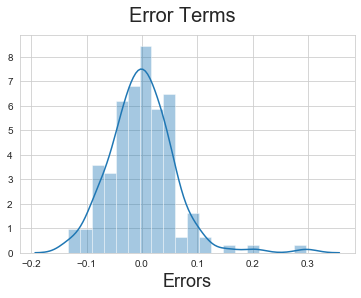

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

> Error terms are following normal distribution as per our expectation

## 10. Making preditions on the final model with the test data set

### scale the numerical variables

In [92]:
num_vars = ['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'cylindernumber',
 'price']

auto_test[num_vars] = scaler.transform(auto_test[num_vars])

In [93]:
auto_test.describe()

symboling   fueltype  aspiration  enginelocation  wheelbase  carlength  \
count  62.000000  62.000000   62.000000       62.000000  62.000000  62.000000   
mean    0.583871   0.887097    0.822581        0.967742   0.437764   0.559481   
std     0.271724   0.319058    0.385142        0.178127   0.212861   0.189947   
min     0.000000   0.000000    0.000000        0.000000   0.000000   0.056911   
25%     0.400000   1.000000    1.000000        1.000000   0.313793   0.459350   
50%     0.600000   1.000000    1.000000        1.000000   0.387931   0.547967   
75%     0.800000   1.000000    1.000000        1.000000   0.570690   0.719919   
max     1.000000   1.000000    1.000000        1.000000   1.182759   1.089431   

        carwidth  carheight  curbweight  cylindernumber  ...      sedan  \
count  62.000000  62.000000   62.000000       62.000000  ...  62.000000   
mean    0.480376   0.559663    0.428470        0.232258  ...   0.451613   
std     0.165440   0.215811    0.179488        0.088288  ...   0.501716   
min     0.183333   0.141593    0.128394        0.200000  ...   0.000000   
25%     0.358333   0.384956    0.305275        0.200000  ...   0.000000   
50%     0.441667   0.588496    0.406129        0.200000  ...   0.000000   
75%     0.516667   0.699115    0.564876        0.200000  ...   1.000000   
max     0.975000   1.061947    0.935609        0.600000  ...   1.000000   

           wagon        fwd        rwd  dohcv          l        ohc  \
count  62.000000  62.000000  62.000000   62.0  62.000000  62.000000   
mean    0.096774   0.564516   0.419355    0.0   0.048387   0.806452   
std     0.298064   0.499868   0.497482    0.0   0.216335   0.398304   
min     0.000000   0.000000   0.000000    0.0   0.000000   0.000000   
25%     0.000000   0.000000   0.000000    0.0   0.000000   1.000000   
50%     0.000000   1.000000   0.000000    0.0   0.000000   1.000000   
75%     0.000000   1.000000   1.000000    0.0   0.000000   1.000000   
max     1.000000   1.000000   1.000000    0.0   1.000000   1.000000   

            ohcf       ohcv  rotor  
count  62.000000  62.000000   62.0  
mean    0.048387   0.064516    0.0  
std     0.216335   0.247676    0.0  
min     0.000000   0.000000    0.0  
25%     0.000000   0.000000    0.0  
50%     0.000000   0.000000    0.0  
75%     0.000000   0.000000    0.0  
max     1.000000   1.000000    0.0  

[8 rows x 37 columns]

In [94]:
y_test = auto_test.pop('price')
X_test = auto_test

In [95]:
X_test_m14 = sm.add_constant(X_test)
X_test_m14 = X_test_m14.drop(['l','fwd', 'carlength', 'fueltype', 'spfi', '4bbl', '2bbl', 'mfi', 'mpfi', 'ohcv', 'curbweight', 'compressionratio', 'idi'], axis = 1)

In [96]:
X_test_m14.describe()

const  symboling  aspiration  enginelocation  wheelbase   carwidth  \
count   62.0  62.000000   62.000000       62.000000  62.000000  62.000000   
mean     1.0   0.583871    0.822581        0.967742   0.437764   0.480376   
std      0.0   0.271724    0.385142        0.178127   0.212861   0.165440   
min      1.0   0.000000    0.000000        0.000000   0.000000   0.183333   
25%      1.0   0.400000    1.000000        1.000000   0.313793   0.358333   
50%      1.0   0.600000    1.000000        1.000000   0.387931   0.441667   
75%      1.0   0.800000    1.000000        1.000000   0.570690   0.516667   
max      1.0   1.000000    1.000000        1.000000   1.182759   0.975000   

       carheight  cylindernumber  enginesize  boreratio  ...       spdi  \
count  62.000000       62.000000   62.000000  62.000000  ...  62.000000   
mean    0.559663        0.232258    0.265673   0.556580  ...   0.048387   
std     0.215811        0.088288    0.162820   0.228484  ...   0.216335   
min     0.141593        0.200000    0.067925  -0.111111  ...   0.000000   
25%     0.384956        0.200000    0.177358   0.404762  ...   0.000000   
50%     0.588496        0.200000    0.226415   0.563492  ...   0.000000   
75%     0.699115        0.200000    0.316038   0.746032  ...   0.000000   
max     1.061947        0.600000    0.932075   0.888889  ...   1.000000   

         hardtop  hatchback      sedan      wagon        rwd  dohcv  \
count  62.000000  62.000000  62.000000  62.000000  62.000000   62.0   
mean    0.080645   0.338710   0.451613   0.096774   0.419355    0.0   
std     0.274512   0.477134   0.501716   0.298064   0.497482    0.0   
min     0.000000   0.000000   0.000000   0.000000   0.000000    0.0   
25%     0.000000   0.000000   0.000000   0.000000   0.000000    0.0   
50%     0.000000   0.000000   0.000000   0.000000   0.000000    0.0   
75%     0.000000   1.000000   1.000000   0.000000   1.000000    0.0   
max     1.000000   1.000000   1.000000   1.000000   1.000000    0.0   

             ohc       ohcf  rotor  
count  62.000000  62.000000   62.0  
mean    0.806452   0.048387    0.0  
std     0.398304   0.216335    0.0  
min     0.000000   0.000000    0.0  
25%     1.000000   0.000000    0.0  
50%     1.000000   0.000000    0.0  
75%     1.000000   0.000000    0.0  
max     1.000000   1.000000    0.0  

[8 rows x 24 columns]

In [97]:
y_pred_m14 = lr_14.predict(X_test_m14)

Text(0, 0.5, 'y_pred')

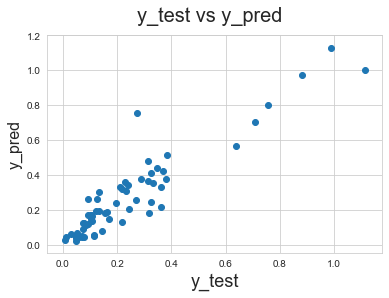

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m14)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m14)

0.818445770928096